<a href="https://colab.research.google.com/github/Alinabutt/Alinabutt.github.io/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding categorical data

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')

X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


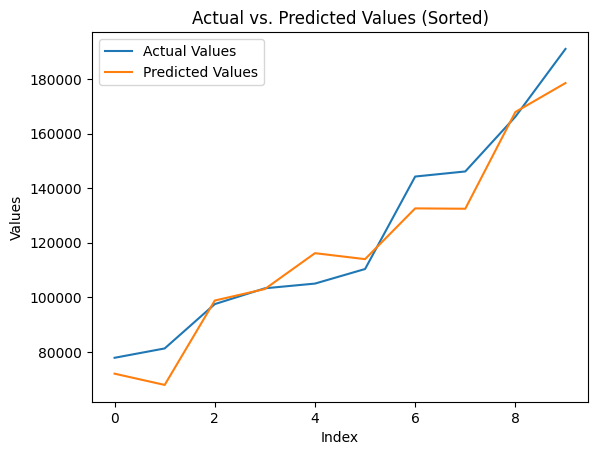

In [11]:
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
plt.plot(y_test_sorted, label='Actual Values')
plt.plot(y_pred_sorted, label='Predicted Values')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values (Sorted)")
plt.legend()
plt.show()